In [10]:
import tensorflow as tf
from tensorflow import keras

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if(logs.get('accuracy')>0.9):
            print("\nReached optimal accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
##load data
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

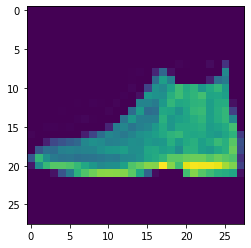

In [4]:
import numpy as np
np.set_printoptions(linewidth = 200)
import matplotlib.pyplot as plt
#Disaplay the first image in training
plt.imshow(X_test[0])
print(y_train[0])
print(X_train[0])

All values of image are numbers between 0 and 255. To normalize this we have to have very number betwen 0 and 1

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
callbacks = myCallback()

In [7]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Last layer has 10 nuerons because there are 10 classes of clothing (labels) in dataset
First layer flattens the square into a linear array. Square is input image size 28X28

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4787 - accuracy: 0.8310
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3600 - accuracy: 0.8681
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3211 - accuracy: 0.8812
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2981 - accuracy: 0.8888
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2791 - accuracy: 0.8968
Epoch 6/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.9021
Reached optimal accuracy so cancelling training!
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2637 - accuracy: 0.9021


In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3347 - accuracy: 0.8810


[0.3347362241744995, 0.881]